## Getting Satellite Images


In [3]:
import csv
import os
import requests

# Mapbox access token
access_token = 'pk.eyJ1IjoicHdpbGxpYW1zcGVuaWVsIiwiYSI6ImNseTVlaDY5NDA2ajQyanNibTJ0NzRlaHEifQ.CIy2ghSbnbxjZObgNqyMqQ'

# Path to CSV file
csv_file_path = '/content/drive/MyDrive/Autoencoders/data_dir/demo_tract.csv'

# Image path folder
output_folder = '/content/drive/MyDrive/Autoencoders/data_directory/satellite_images'

#Parameters for the Mapbox Static Images API
mapbox_api_url = 'https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static'
image_size = '256x256'
zoom_level = 15
bearing = 0

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Open the CSV file and read the coordinates
with open(csv_file_path, mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:

        latitude = row['INTPTLAT']
        longitude = row['INTPTLON']

        # Construct the API URL with the coordinates
        api_url = f'{mapbox_api_url}/{longitude},{latitude},{zoom_level},{bearing}/{image_size}?access_token={access_token}'

        # Make the request to the Mapbox API
        response = requests.get(api_url)

        # Check if the request was successful
        if response.status_code == 200:
            # Define the output image path
            image_path = os.path.join(output_folder, f'image_{longitude}_{latitude}.png')

            # Save the image to the output folder
            with open(image_path, 'wb') as image_file:
                image_file.write(response.content)

            print(f'Image saved for coordinates {longitude}, {latitude}')
        else:
            print(f'Failed to retrieve image for coordinates {longitude}, {latitude}')

Image saved for coordinates -102.5331983, +46.0968146
Image saved for coordinates -097.8551057, +46.9370110
Image saved for coordinates -098.2386037, +46.9379265
Image saved for coordinates -098.0215419, +46.9195583
Image saved for coordinates -097.9842832, +46.9299130
Image saved for coordinates -099.1577586, +47.9418196
Image saved for coordinates -098.7589395, +47.9268862
Image saved for coordinates -099.5357163, +48.1305920
Image saved for coordinates -103.3640163, +47.0070440
Image saved for coordinates -100.4460399, +48.8206477
Image saved for coordinates -100.5257167, +48.8022043
Image saved for coordinates -101.2015486, +48.7703061
Image saved for coordinates -103.3943289, +46.2009980
Image saved for coordinates -103.5059433, +46.1101438
Image saved for coordinates -102.5200874, +48.7864534
Image saved for coordinates -100.7866265, +46.8089077
Image saved for coordinates -100.7645331, +46.8107113
Image saved for coordinates -100.7641087, +46.8235691
Image saved for coordinates 


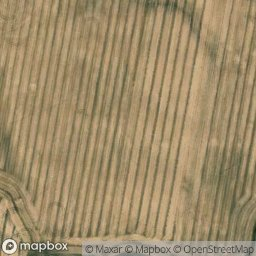
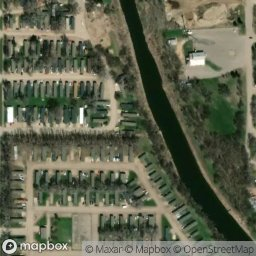
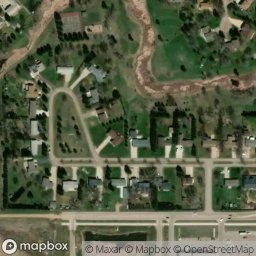
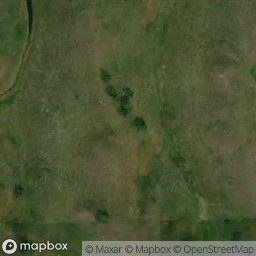
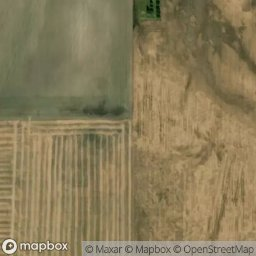

In [13]:
import os
import glob
import random
import base64
from IPython.display import display, HTML

# Get a list of all images in the folder
image_files = glob.glob('/content/drive/MyDrive/Autoencoders/data_directory/satellite_images/*.png')

# Randomly select 5 images
random_images = random.sample(image_files, 5)

# Generate HTML to display images horizontally
html_content = '<div style="display: flex; justify-content: space-between;">'
for img_file in random_images:
    with open(img_file, 'rb') as img_f:
        img_data = base64.b64encode(img_f.read()).decode('utf-8')
    html_content += f'<div style="margin: 10px;"><img src="data:image/png;base64,{img_data}" style="width: 256px; height: 256px;"></div>'
html_content += '</div>'

# Display the images
display(HTML(html_content))


In [14]:
import cv2
import numpy as np

In [15]:
image_list = glob.glob('/content/drive/MyDrive/Autoencoders/data_directory/satellite_images/*.png')

In [16]:
len(image_list)

228

### Crop

In [17]:
def center_crop(img, dim):
    """Returns center cropped image
    Args:
    img: image to be center cropped
    dim: dimensions (width, height) to be cropped
    """

    width, height = img.shape[1], img.shape[0]

    # process crop width and height for max available dimension
    crop_width = dim[0] if dim[0]<img.shape[1] else img.shape[1]
    crop_height = dim[1] if dim[1]<img.shape[0] else img.shape[0]
    mid_x, mid_y = int(width/2), int(height/2)
    cw2, ch2 = int(crop_width/2), int(crop_height/2)
    crop_img = img[mid_y-ch2:mid_y+ch2, mid_x-cw2:mid_x+cw2]
    return crop_img


In [18]:
# Directory to save processed images with '_64'
output_folder = '/content/drive/MyDrive/Autoencoders/data_directory/satellite_images_64'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Process each image in the list
for i in image_list:
    # Read the image
    im = cv2.imread(i)

    # Apply center crop and resize
    im = center_crop(im, (224, 224))
    im = cv2.resize(im, (64, 64))

    # Extract the file name from the path
    file_name = os.path.basename(i)

    # Create a new file name with '_64' attached
    new_name = os.path.join(output_folder, file_name.replace('.png', '_64.png'))

    # Save the processed image with the new name
    cv2.imwrite(new_name, im)

    print(f'Saved processed image as {new_name}')


Saved processed image as /content/drive/MyDrive/Autoencoders/data_directory/satellite_images_64/image_-102.5331983_+46.0968146_64.png
Saved processed image as /content/drive/MyDrive/Autoencoders/data_directory/satellite_images_64/image_-097.8551057_+46.9370110_64.png
Saved processed image as /content/drive/MyDrive/Autoencoders/data_directory/satellite_images_64/image_-098.2386037_+46.9379265_64.png
Saved processed image as /content/drive/MyDrive/Autoencoders/data_directory/satellite_images_64/image_-098.0215419_+46.9195583_64.png
Saved processed image as /content/drive/MyDrive/Autoencoders/data_directory/satellite_images_64/image_-097.9842832_+46.9299130_64.png
Saved processed image as /content/drive/MyDrive/Autoencoders/data_directory/satellite_images_64/image_-099.1577586_+47.9418196_64.png
Saved processed image as /content/drive/MyDrive/Autoencoders/data_directory/satellite_images_64/image_-098.7589395_+47.9268862_64.png
Saved processed image as /content/drive/MyDrive/Autoencoders/d


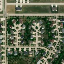
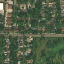
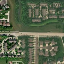
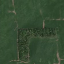
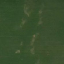

In [23]:
# Get a list of all images in the folder
image_files = glob.glob('/content/drive/MyDrive/Autoencoders/data_directory/satellite_images_64/*.png')

# Randomly select 5 images
random_images = random.sample(image_files, 5)

# Generate HTML to display images horizontally
html_content = '<div style="display: flex; justify-content: center;">'
for img_file in random_images:
    with open(img_file, 'rb') as img_f:
        img_data = base64.b64encode(img_f.read()).decode('utf-8')
    html_content += f'<div style="margin: 5px;"><img src="data:image/png;base64,{img_data}" style="width: 64px; height: 64px;"></div>'
html_content += '</div>'

# Display the images
display(HTML(html_content))


## Blur

In [24]:
image_list = glob.glob('/content/drive/MyDrive/Autoencoders/data_directory/satellite_images/*.png')

In [25]:
image_list[:5]

['/content/drive/MyDrive/Autoencoders/data_directory/satellite_images/image_-102.5331983_+46.0968146.png',
 '/content/drive/MyDrive/Autoencoders/data_directory/satellite_images/image_-097.8551057_+46.9370110.png',
 '/content/drive/MyDrive/Autoencoders/data_directory/satellite_images/image_-098.2386037_+46.9379265.png',
 '/content/drive/MyDrive/Autoencoders/data_directory/satellite_images/image_-098.0215419_+46.9195583.png',
 '/content/drive/MyDrive/Autoencoders/data_directory/satellite_images/image_-097.9842832_+46.9299130.png']

In [26]:
# Directory to save processed images with 'zoom15_bilateral'
output_folder = '/content/drive/MyDrive/Autoencoders/data_directory/satellite_images_bilateral'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Process each image in the list
for i in image_list:
    # Read the image
    im = cv2.imread(i)

    # Apply bilateral blur
    im_bilateral = cv2.bilateralFilter(src=im, d=7, sigmaColor=20, sigmaSpace=200)
    for j in range(5):
        im_bilateral = cv2.bilateralFilter(src=im_bilateral, d=7, sigmaColor=20, sigmaSpace=200)


    # Extract the file name from the path
    file_name = os.path.basename(i)

    # Create a new file name with 'zoom15_bilateral' attached
    new_name = os.path.join(output_folder, file_name.replace('.png', 'zoom15_bilateral.png'))

    # Save the processed image with the new name
    cv2.imwrite(new_name, im_bilateral)

    print(f'Saved processed image as {new_name}')


Saved processed image as /content/drive/MyDrive/Autoencoders/data_directory/satellite_images_bilateral/image_-102.5331983_+46.0968146zoom15_bilateral.png
Saved processed image as /content/drive/MyDrive/Autoencoders/data_directory/satellite_images_bilateral/image_-097.8551057_+46.9370110zoom15_bilateral.png
Saved processed image as /content/drive/MyDrive/Autoencoders/data_directory/satellite_images_bilateral/image_-098.2386037_+46.9379265zoom15_bilateral.png
Saved processed image as /content/drive/MyDrive/Autoencoders/data_directory/satellite_images_bilateral/image_-098.0215419_+46.9195583zoom15_bilateral.png
Saved processed image as /content/drive/MyDrive/Autoencoders/data_directory/satellite_images_bilateral/image_-097.9842832_+46.9299130zoom15_bilateral.png
Saved processed image as /content/drive/MyDrive/Autoencoders/data_directory/satellite_images_bilateral/image_-099.1577586_+47.9418196zoom15_bilateral.png
Saved processed image as /content/drive/MyDrive/Autoencoders/data_directory/


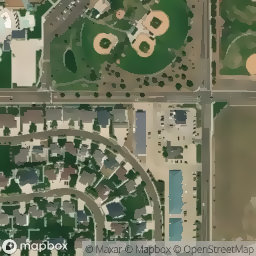
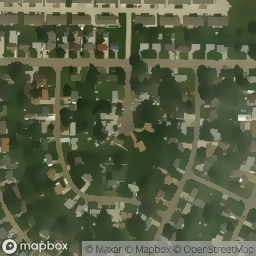
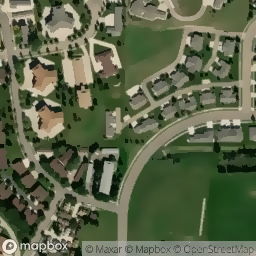
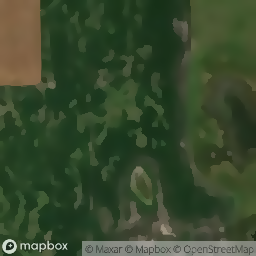
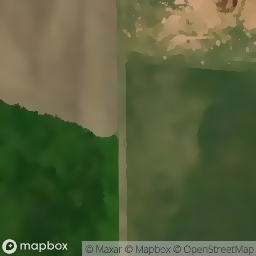

In [29]:
# Get a list of all images in the folder
image_files = glob.glob('/content/drive/MyDrive/Autoencoders/data_directory/satellite_images_bilateral/*.png')

# Randomly select 5 images
random_images = random.sample(image_files, 5)

# Generate HTML to display images horizontally
html_content = '<div style="display: flex; justify-content: space-between;">'
for img_file in random_images:
    with open(img_file, 'rb') as img_f:
        img_data = base64.b64encode(img_f.read()).decode('utf-8')
    html_content += f'<div style="margin: 5px;"><img src="data:image/png;base64,{img_data}" style="width: 256px; height: 256px;"></div>'
html_content += '</div>'

# Display the images
display(HTML(html_content))
